<a href="https://colab.research.google.com/github/javierber/projects-repo/blob/main/Copy_of_Project_1_Part_2__3_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 1 - Part 2 (Core)**


We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step! First, clone the GitHub repo you created to house your project so you are able to commit your work to this repository. See the video at the end of this assignment if you are unsure of how to do this.

Your data should already be loaded into your notebook from part 1 of the project.
Explore the data - what do you need to do to clean this data? Clean it!  
Be sure to address each of the following tasks:

**TASKS**
1.  How many rows and columns?
2.  What are the datatypes of each variable?
3.   Are there duplicates? If so, drop any duplicates.
4.   Identify missing values.
5.   Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
6.   Confirm that there are no missing values after addressing them.
7.   Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
8.   For any numerical columns, obtain the summary statistics of each (min, max, mean)

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional Pandas resources at the end of this Chapter for more resources on this):
Missing Data, its types, and statistical methods to deal with it
6 Different Ways to Compensate for Missing Values In a Dataset
Dealing with missing data: Key assumptions and methods for applied analysis
Feel free to use any other resources or techniques you find online that you think are appropriate/useful
Here is the Data Dictionary for this dataset:

Variable Name	Description

*   **Item_Identifier**	=  Unique product ID
*   **Item_Weight**	 = Weight of product
*   **Item_Fat_Content**  =	Whether the product is low fat or regular
*   **Item_Visibility**  = 	The percentage of total display area of all products in a store allocated to the particular product
*   **Item_Type**	= The category to which the product belongs
*   **Item_MRP** =	Maximum Retail Price (list price) of the product
*   **Outlet_Identifier**	= Unique store ID
*   **Outlet_Establishment_Year**  =	The year in which store was established
*   **Outlet_Size**	= The size of the store in terms of ground area covered
*   **Outlet_Location_Type** =	The type of area in which the store is located
*   **Outlet_Type**	  =Whether the outlet is a grocery store or some sort of supermarket
*   **Item_Outlet_Sales**  =	Sales of the product in the particular store. This is the target variable to be predicted.














In [1]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import pandas as pd
import numpy as np


In [3]:
import pandas as pd
file = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(file, header =0)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [5]:
#2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [7]:
#4) Identify missing values.
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
#Data Cleanup
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#5) Decide on how to address the missing values and do it! 
#(This requires your judgement, so explain your choice).
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [10]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

5 -Found missing data for the Outlet_Size column & Item_Weight.  Decided to address this issue by performing replace Nan with NoData naming for the missing data. Item_Weight present and can be used to substitute the missing Item_Weight for Item_Identifier.This should solve the problem. A similar code was used for the Item_Weight but the missing data was replaced with mean information

In [12]:
#6) Confirm that there are no missing values after addressing them.
print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
#source:https://medium.com/analytics-vidhya/bigmart-dataset-sales-prediction-c1f1cdca9af1
# Replacing 0's with NaN
df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

# Now fill by mean of visbility based on item identifiers
df.Item_Visibility = df.Item_Visibility.fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

# Checking if Imputation was carried out successfully
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
crosstable = pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [15]:
dic = {'Grocery Store':'Small'}
s1 = df.Outlet_Type.map(dic)
df.Outlet_Size = df.Outlet_Size.combine_first(s1)
df.Outlet_Size.value_counts()       

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [16]:
# Checking if imputation was successful
df.isnull().sum(axis=0) 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
dic = {"Tier 2":"Small"}
s2 = df.Outlet_Location_Type.map(dic)
df.Outlet_Size = df.Outlet_Size.combine_first(s2)
df.isnull().sum(axis=0)
df.Outlet_Size.value_counts()  

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df.Item_Identifier.value_counts().sum()

8523

In [19]:
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [20]:
#7) Find and fix any inconsistent categories of data 
#(example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('lf', 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'regular')
df['Item_Fat_Content'].value_counts(dropna=False)

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
#8) For any numerical columns, obtain the summary statistics
# of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070749,140.992782,1997.831867,2181.288914
std,4.226124,0.050313,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.031395,93.826500,1987.000000,834.247400
50%,12.857645,0.058100,143.012800,1999.000000,1794.331000
75%,16.000000,0.098867,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Project 1 - Part 3 (Core)**

We will continue to work on your sales 

prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

**For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:**



*   **TASK 1** Histogram to view the distributions of various features in your dataset.
*   **TASK 2** Boxplot to view statistical summaries of various features in your dataset.
*   **TASK 3** Heatmap of the correlation between features.
*   **TASK 4** Please feel free to add more than the minimum. Remember this is your chance to display your skills!
*  **TASK 5** Commit your work to GitHub.

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

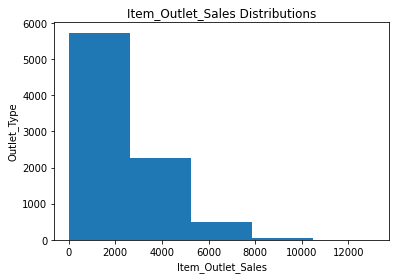

None

In [24]:
#TASK 1 Histogram to view the distributions of various features in your dataset.
df[['Outlet_Type', 'Item_Outlet_Sales']].groupby('Outlet_Type').agg(['mean', 'sum', 'count'])
plt.hist(df.Item_Outlet_Sales, bins=5);
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Outlet_Type")
plt.title("Item_Outlet_Sales Distributions")
display(plt.show())


In [25]:
categorical_data = df.select_dtypes(include=[np.object])
numerical_data = df.select_dtypes(include=[np.number])
print(categorical_data.dtypes)
print(numerical_data.dtypes)

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object


<BarContainer object of 16 artists>

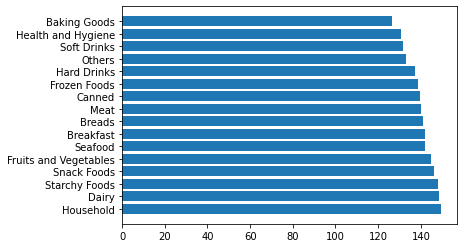

In [26]:
#avg Item_MRP for each Item_Type
avgsales_peritemtype = df[['Item_Type', 'Item_MRP']].groupby('Item_Type').mean().sort_values(by='Item_MRP', ascending=False).round(2)
plt.barh(y=avgsales_peritemtype.index, width=avgsales_peritemtype.Item_MRP)


<BarContainer object of 9 artists>

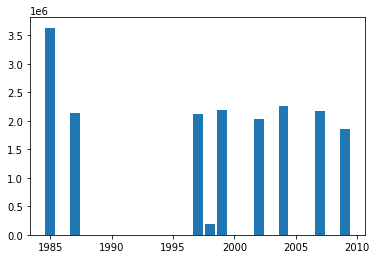

In [27]:
yearlysales = df[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').sum()
plt.bar(x=yearlysales.index, height=yearlysales.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


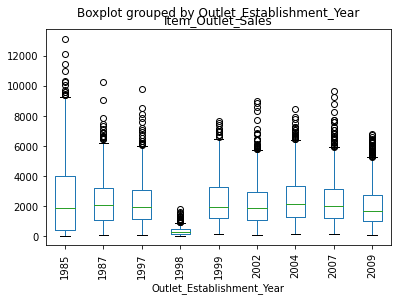

In [28]:
#TASK 2 Boxplot to view statistical summaries of various features in your dataset.
df.boxplot(by='Outlet_Establishment_Year', column='Item_Outlet_Sales', grid= False, rot=90);

In [29]:
#source: https://www.bluegranite.com/blog/predicting-sales-with-the-aid-of-pandas
corr = numerical_data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020792,0.024756,-0.008301,0.011550
Item_Visibility,-0.020792,1.000000,-0.005951,-0.075238,-0.126026
Item_MRP,0.024756,-0.005951,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.075238,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.126026,0.567574,-0.049135,1.000000


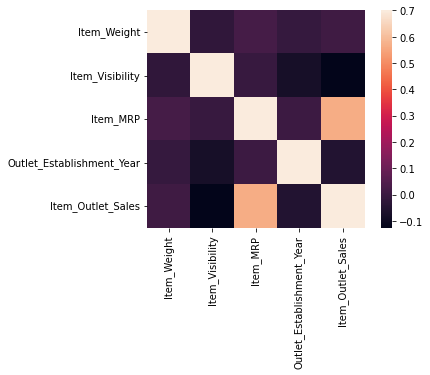

In [30]:
#TASK 3 Heatmap of the correlation between features.
#source: https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7
sns.heatmap(corr, vmax=.7, square=True);

<Figure size 432x288 with 0 Axes>

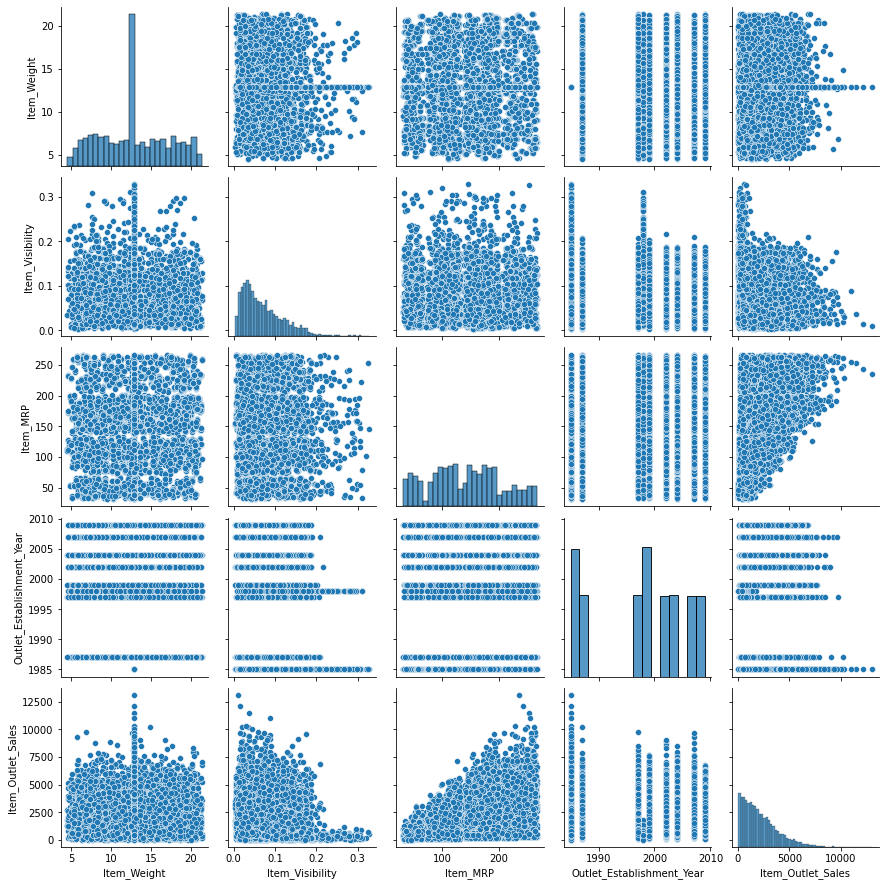

None

In [31]:
#TASK 4 Please feel free to add more than the minimum. Remember this is your chance to display your skills!
#source: https://www.bluegranite.com/blog/predicting-sales-with-the-aid-of-pandas
plt.figure()
sns.pairplot(df)
display(plt.show())

<Figure size 432x288 with 0 Axes>

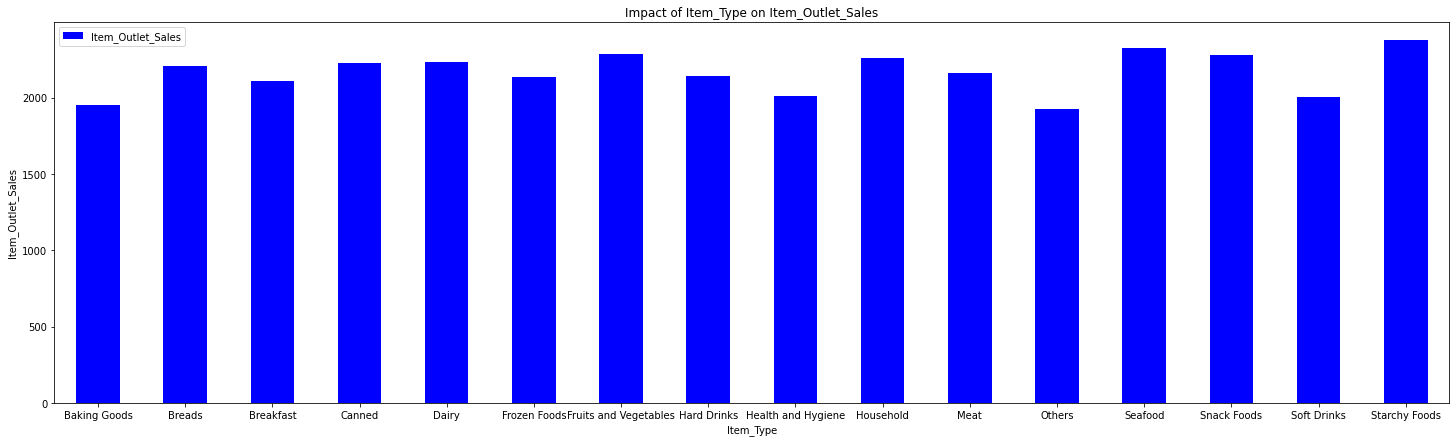

None

In [32]:
#source: https://www.bluegranite.com/blog/predicting-sales-with-the-aid-of-pandas
plt.figure()

Item_Type_pivot = df.pivot_table(index='Item_Type', values='Item_Outlet_Sales', aggfunc=np.mean)

Item_Type_pivot.plot(kind='bar', color='blue',figsize=(25,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
display(plt.show())

#**Project 1 - Part 4 (Core)**

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to 

**TASK1:** build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
**TASK2:** Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

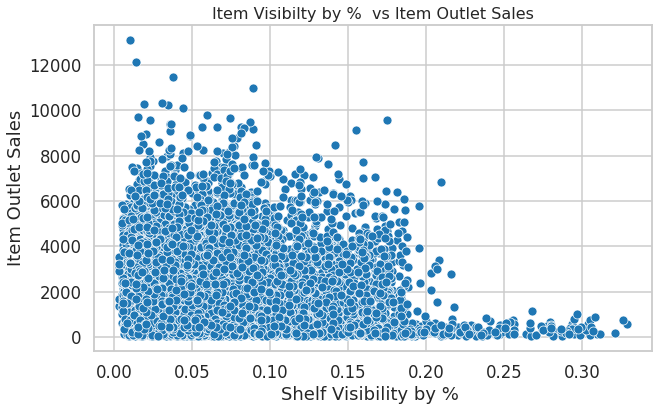

In [49]:
plt.figure(figsize=(10,6))
ad = sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df);
ad.set(xlabel="Shelf Visibility by % ", ylabel = "Item Outlet Sales");
ad.set_title("Item Visibilty by %  vs Item Outlet Sales", fontsize=16);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


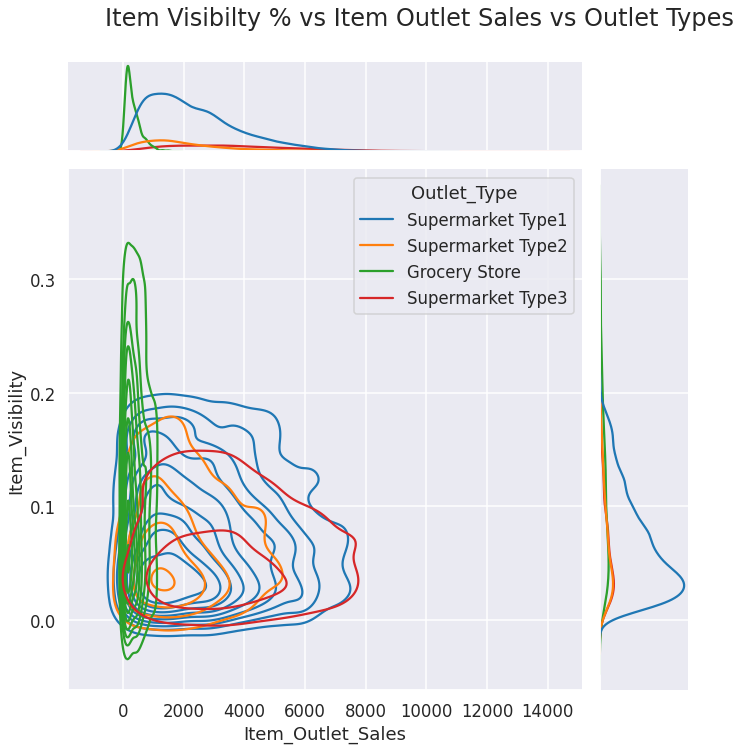

In [79]:
#source: https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set_style('darkgrid')
ax1 = sns.jointplot('Item_Outlet_Sales','Item_Visibility', hue='Outlet_Type',data=df,kind="kde",   height=10, aspect=1.25)
plt.suptitle("Item Visibilty % vs Item Outlet Sales vs Outlet Types", x=.60, y=1.05, fontsize= 24)
plt.show();

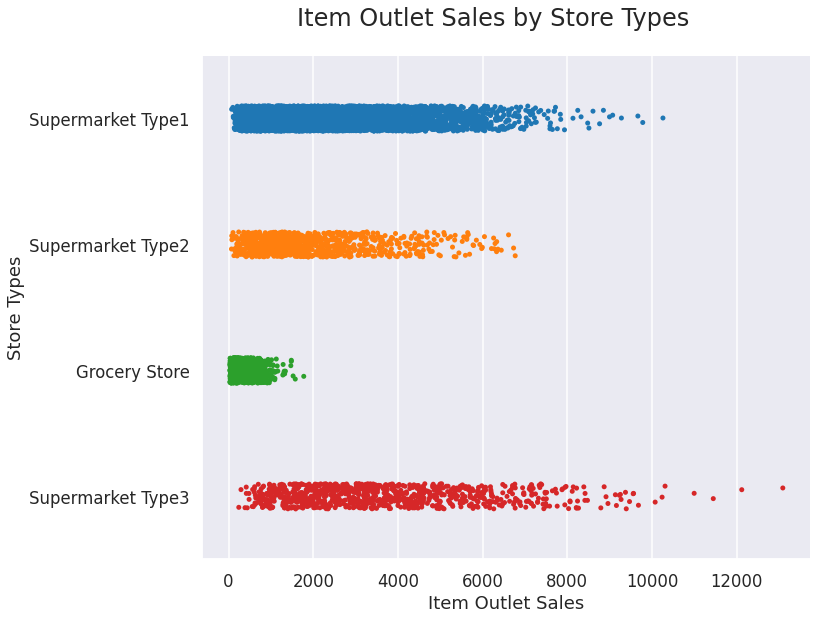

In [80]:
#source: https://seaborn.pydata.org/generated/seaborn.catplot.html
ax2 = sns.catplot(x='Item_Outlet_Sales', y='Outlet_Type', data = df, height=8.27, aspect=11.7/8.27);
ax2.set(xlabel="Item Outlet Sales", ylabel = "Store Types");
ax2.fig.suptitle("Item Outlet Sales by Store Types", x=.60, y=1.05, fontsize= 24);



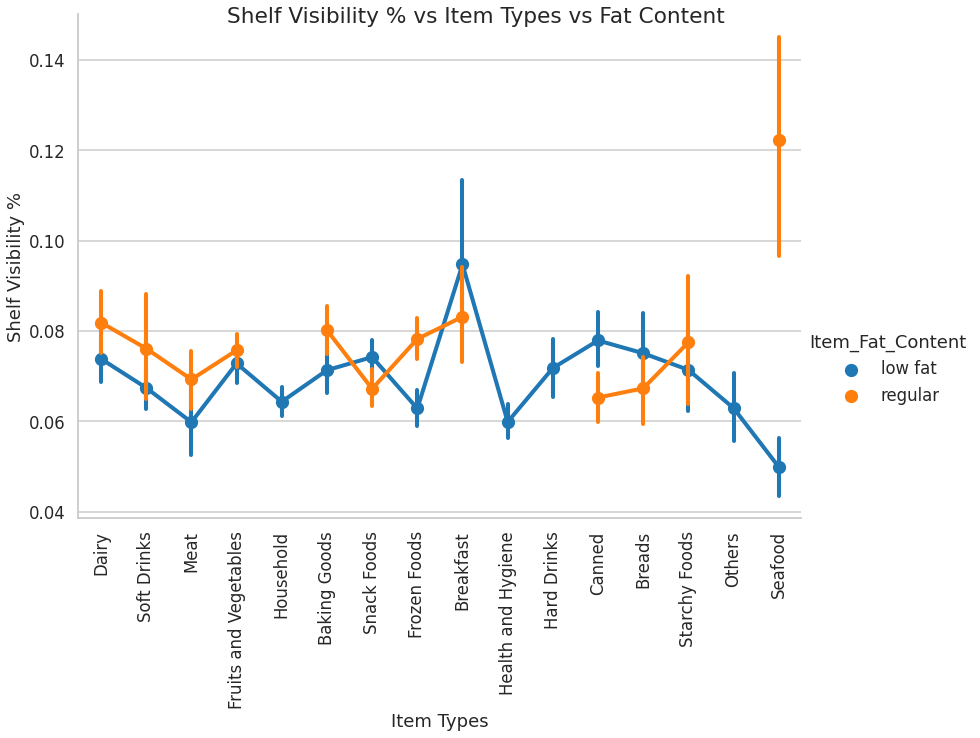

In [61]:
#source: https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.set_style("whitegrid")
ax3 = sns.catplot(x="Item_Type", y="Item_Visibility", hue="Item_Fat_Content",kind="point", data=df, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90);
ax3.set(xlabel="Item Types", ylabel = "Shelf Visibility %");
ax3.fig.suptitle("Shelf Visibility % vs Item Types vs Fat Content");

